In [ ]:
%pip install opendatasets --quiet
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/mssmarypants/rice-type-classification")

Note: you may need to restart the kernel to use updated packages.
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam 
from torch.utils.data import DataLoader,Dataset
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")



Using device: cuda


In [2]:
data_df = pd.read_csv("data/raw/riceClassification.csv")
print(data_df.head())

   id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1  


In [3]:
data_df.dropna(inplace=True)
data_df.drop(['id'],axis=1,inplace=True)
print(data_df.shape)

(18185, 11)


In [4]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [5]:
original_df = data_df.copy()

for column in data_df.columns:
    data_df[column] = (data_df[column]/data_df[column].abs().max())

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [6]:
X =np.array(data_df.iloc[:,:-1])
y=np.array(data_df.iloc[:,-1])


In [7]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [9]:
X_train.shape

(12729, 10)

In [10]:
class dataset(Dataset):
    def __init__(self,X,y):
        self.X =torch.tensor(X,dtype=torch.float32).to(device) # pyright: ignore[reportUndefinedVariable] #ignore:dtype
        self.y =torch.tensor(y,dtype=torch.float32).to(device) # pyright: ignore[reportUndefinedVariable] 

    def __len__(self):
        return len(self.X)
    
    
    def __getitem__(self,index): 
        return self.X[index],self.y[index]
    

In [11]:
training_data =dataset(X_train,y_train)
validation_data =dataset(X_val,y_val)
testing_data =dataset(X_test,y_test)

In [12]:
train_dataloader = DataLoader(training_data,batch_size=8,shuffle=True)
val_dataloader = DataLoader(validation_data,batch_size=8,shuffle=False)
test_dataloader = DataLoader(testing_data,batch_size=8,shuffle=False)

In [13]:
for x,y in train_dataloader:
    print(x)
    print("=====================")
    print(y)
    break

tensor([[0.7792, 0.7783, 0.8704, 0.8935, 0.7456, 0.8827, 0.8426, 0.6900, 0.8975,
         0.5073],
        [0.7031, 0.9214, 0.6682, 0.9776, 0.6714, 0.8385, 0.5721, 0.7343, 0.7151,
         0.7823],
        [0.8701, 0.8726, 0.8674, 0.9248, 0.8291, 0.9328, 0.7073, 0.7487, 0.8512,
         0.5707],
        [0.6685, 0.9188, 0.6380, 0.9824, 0.6339, 0.8176, 0.9204, 0.7230, 0.7013,
         0.8171],
        [0.6422, 0.9260, 0.6008, 0.9892, 0.6087, 0.8014, 0.5641, 0.7191, 0.6811,
         0.8744],
        [0.7411, 0.8141, 0.7919, 0.9297, 0.7047, 0.8609, 0.6478, 0.6979, 0.8344,
         0.5832],
        [0.6543, 0.9035, 0.6312, 0.9818, 0.6201, 0.8089, 0.5633, 0.7133, 0.7052,
         0.8121],
        [0.7277, 0.8450, 0.7514, 0.9477, 0.6930, 0.8531, 0.8952, 0.7046, 0.8038,
         0.6380]], device='cuda:0')
tensor([0., 1., 0., 1., 1., 0., 1., 1.], device='cuda:0')


In [15]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        self.input_layer = nn.Linear(X.shape[1],HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS,1)
        self.sigmoid =nn.Sigmoid()


    def forward(self,x):
        x = self.input_layer(x)
        x =self.linear(x)
        x = self.sigmoid(x)
        return x
model = MyModel().to(device)

In [16]:
summary(model,(X.shape[1],))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10]                  110
├─Linear: 1-2                            [-1, 1]                   11
├─Sigmoid: 1-3                           [-1, 1]                   --
Total params: 121
Trainable params: 121
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10]                  110
├─Linear: 1-2                            [-1, 1]                   11
├─Sigmoid: 1-3                           [-1, 1]                   --
Total params: 121
Trainable params: 121
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [17]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [29]:
total_loss_train_plot =[]
total_loss_val_plot =[]
total_acc_train_plot =[]
total_acc_val_plot =[]

epochs = 10
for epoch in range(epochs):
    total_acc_train =0
    total_loss_train =0
    total_acc_val =0
    total_loss_val =0

    for data in train_dataloader:
        inputs,labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)
        total_loss_train += batch_loss.item()

        acc =((prediction).round() == labels).sum().item()
        
        total_acc_train += acc
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in val_dataloader:
            inputs,labels =data 

            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction,labels)
            total_loss_val += batch_loss.item()
            acc =((prediction).round() == labels).sum().item()

            total_acc_val += acc 

    total_loss_train_plot.append(round(total_loss_train/1000,4))
    total_loss_val_plot.append(round(total_loss_val/1000,4))


    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
    total_acc_val_plot.append(round(total_acc_val/validation_data.__len__() * 100,4))

    print(f'EPOCH no, {epoch+1} \t Training Loss: {round(total_loss_train/1000,4)} \t Validation Loss: {round(total_loss_val/1000,4)} \t Training Accuracy: {round(total_acc_train/training_data.__len__() * 100,4)} \t Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100,4)}')

EPOCH no, 1 	 Training Loss: 0.0912 	 Validation Loss: 0.0164 	 Training Accuracy: 98.5623 	 Validation Accuracy: 98.5337
EPOCH no, 2 	 Training Loss: 0.0766 	 Validation Loss: 0.0148 	 Training Accuracy: 98.5545 	 Validation Accuracy: 98.607
EPOCH no, 3 	 Training Loss: 0.0721 	 Validation Loss: 0.0144 	 Training Accuracy: 98.6016 	 Validation Accuracy: 98.5704
EPOCH no, 4 	 Training Loss: 0.0704 	 Validation Loss: 0.014 	 Training Accuracy: 98.5466 	 Validation Accuracy: 98.607
EPOCH no, 5 	 Training Loss: 0.0686 	 Validation Loss: 0.0138 	 Training Accuracy: 98.5702 	 Validation Accuracy: 98.607
EPOCH no, 6 	 Training Loss: 0.0691 	 Validation Loss: 0.0138 	 Training Accuracy: 98.6016 	 Validation Accuracy: 98.6437
EPOCH no, 7 	 Training Loss: 0.0694 	 Validation Loss: 0.0143 	 Training Accuracy: 98.5859 	 Validation Accuracy: 98.5337
EPOCH no, 8 	 Training Loss: 0.0691 	 Validation Loss: 0.0137 	 Training Accuracy: 98.5231 	 Validation Accuracy: 98.6437
EPOCH no, 9 	 Training Loss:

In [30]:
with torch.no_grad():
    total_loss_test =0
    total_acc_test =0
    for data in test_dataloader:
        inputs,labels =data 

        prediction = model(inputs).squeeze(1)
        batch_loss_test= criterion(prediction,labels)
        total_loss_test += batch_loss_test.item()
        acc =((prediction).round() == labels).sum().item()

        total_acc_test += acc

    print(f'Test Loss: {round(total_loss_test/1000,4)} \t Test Accuracy: {round(total_acc_test/testing_data.__len__() * 100,4)}')

Test Loss: 0.0114 	 Test Accuracy: 98.8636


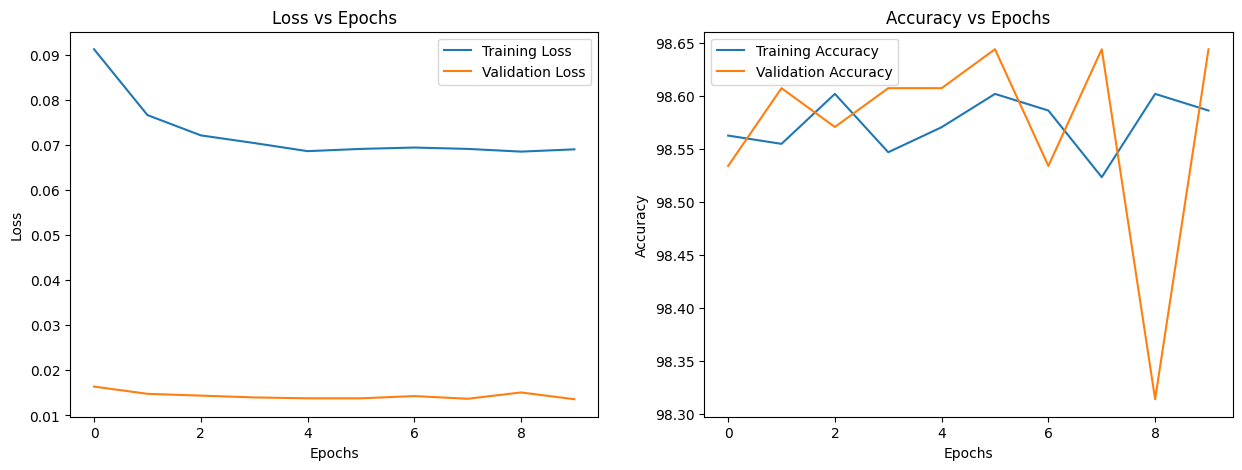

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(total_loss_train_plot,label='Training Loss')
ax[0].plot(total_loss_val_plot,label='Validation Loss')
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(total_acc_train_plot,label='Training Accuracy')
ax[1].plot(total_acc_val_plot,label='Validation Accuracy')
ax[1].set_title('Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()